In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import ExcelWriter
from pandas import ExcelFile


df = pd.read_excel('Junior Data Analyst Data for Case Study.xlsx', engine='openpyxl', sheet_name='Query result')
df.head()

Personal or Business  Business Number Vehicle Type Standard or Express  \
0             Personal              NaN         Bike             Express   
1             Personal              NaN         Bike             Express   
2             Business          20680.0         Bike             Express   
3             Personal              NaN         Bike             Express   
4             Personal              NaN         Bike            Standard   

  Platform                                Cancel Reason Cancelled by  \
0  android  No driver has been allocated to my request.     Customer   
1  android                       My order is not ready.     Customer   
2  android                I placed the wrong locations.     Customer   
3  android                       My order is not ready.     Customer   
4      ios                                   No Partner        Staff   

   Placement Day Placement Time  Confirmation Day Confirmation Time  \
0            1.0       17:55:38               NaN              None   
1            1.0       12:26:27               1.0          12:27:36   
2            1.0       13:21:18               1.0          13:21:34   
3            1.0       10:29:19               NaN              None   
4            1.0       14:34:05               1.0          14:59:08   

   Cancellation Day Cancellation Time  Distance (KM)  Pickup Lat  Pickup Long  \
0               1.0          17:56:35            9.0   -1.313053    36.841437   
1               1.0          12:28:44           14.0   -1.318959    36.853394   
2               1.0          13:47:29           16.0   -1.313854    36.706867   
3               1.0          10:29:29           20.0   -1.206197    36.778776   
4               1.0          15:49:41           11.0   -1.296958    36.808166   

  scheduled  
0  OnDemAND  
1  OnDemAND  
2  OnDemAND  
3  OnDemAND  
4  OnDemAND

In [2]:
import pandas_profiling as pp
pp.ProfileReport(df)


In [3]:
df["Cancelled by"].value_counts()

Customer    4697
Staff       1701
Name: Cancelled by, dtype: int64

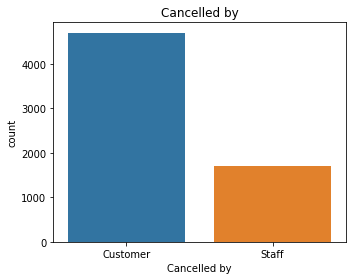

In [4]:
figure,ax=plt.subplots(figsize=(5,4))

sns.countplot(x='Cancelled by',data=df,ax=ax)
ax.set_title('Cancelled by')

plt.tight_layout()

In [5]:
df["Cancel Reason"].value_counts()

No driver has been allocated to my request.    1775
No Partner                                     1293
My order is not ready.                         1214
I placed the wrong locations.                  1114
The driver is too far away.                     594
Customer error                                  337
Delay                                            71
Name: Cancel Reason, dtype: int64

In [6]:
df["Cancel Reason"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

No driver has been allocated to my request.    27.7%
No Partner                                     20.2%
My order is not ready.                         19.0%
I placed the wrong locations.                  17.4%
The driver is too far away.                     9.3%
Customer error                                  5.3%
Delay                                           1.1%
Name: Cancel Reason, dtype: object

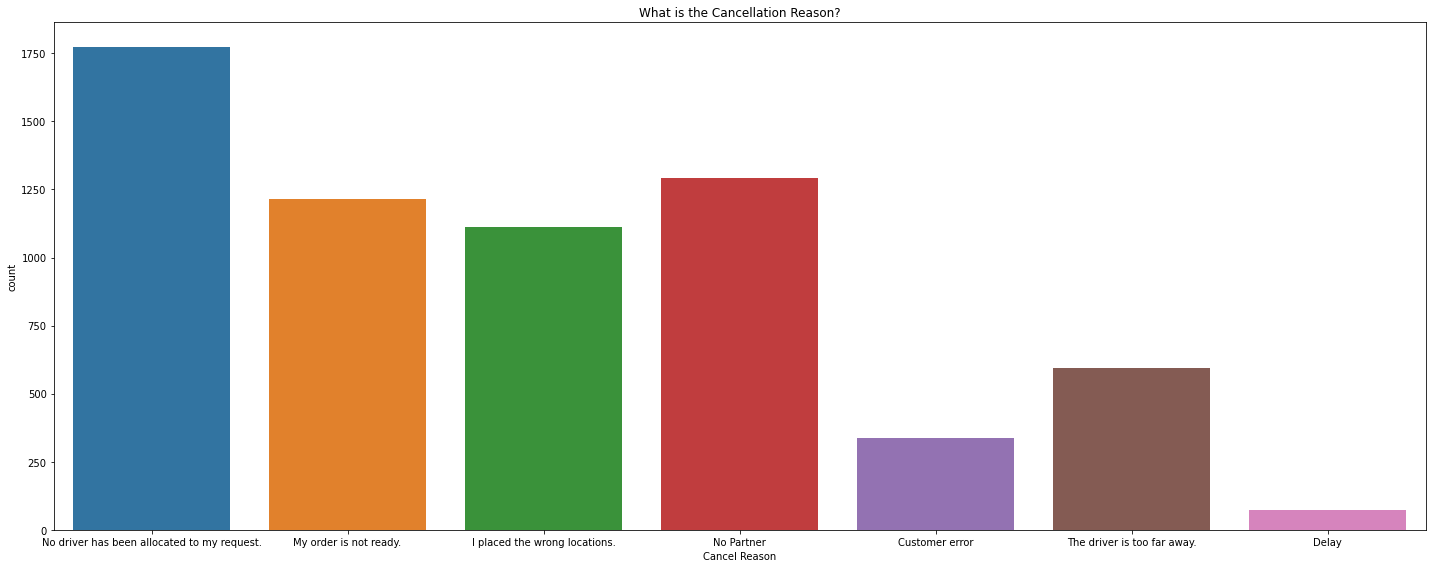

In [7]:
figure,ax=plt.subplots(figsize=(20,8))

sns.countplot(x='Cancel Reason',data=df,ax=ax)
ax.set_title('What is the Cancellation Reason?')

plt.tight_layout()

In [8]:
df["Cancellation Day"].value_counts()

5.0    1308
4.0    1188
3.0    1056
2.0    1045
1.0     832
6.0     661
7.0     308
Name: Cancellation Day, dtype: int64

In [9]:
df["Cancellation Day"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

5.0    20.4%
4.0    18.6%
3.0    16.5%
2.0    16.3%
1.0    13.0%
6.0    10.3%
7.0     4.8%
Name: Cancellation Day, dtype: object

Text(0.5, 1.0, 'Day the order was cancelled')

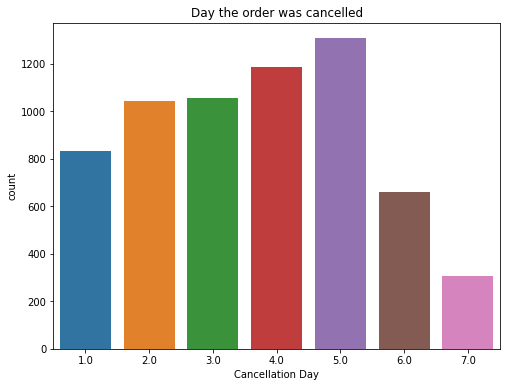

In [10]:

figure,ax=plt.subplots(figsize=(8,6))

sns.countplot(x='Cancellation Day',data=df,ax=ax)
ax.set_title('Day the order was cancelled')

In [11]:
df['Cancellation Time'] = pd.to_timedelta(df['Cancellation Time'].astype(str))

df['diff'] = df['Cancellation Time'].diff()
df['mask'] = df['Cancellation Time'].diff() > pd.Timedelta(5, unit='s')
df.head()

Personal or Business  Business Number Vehicle Type Standard or Express  \
0             Personal              NaN         Bike             Express   
1             Personal              NaN         Bike             Express   
2             Business          20680.0         Bike             Express   
3             Personal              NaN         Bike             Express   
4             Personal              NaN         Bike            Standard   

  Platform                                Cancel Reason Cancelled by  \
0  android  No driver has been allocated to my request.     Customer   
1  android                       My order is not ready.     Customer   
2  android                I placed the wrong locations.     Customer   
3  android                       My order is not ready.     Customer   
4      ios                                   No Partner        Staff   

   Placement Day Placement Time  Confirmation Day Confirmation Time  \
0            1.0       17:55:38               NaN              None   
1            1.0       12:26:27               1.0          12:27:36   
2            1.0       13:21:18               1.0          13:21:34   
3            1.0       10:29:19               NaN              None   
4            1.0       14:34:05               1.0          14:59:08   

   Cancellation Day Cancellation Time  Distance (KM)  Pickup Lat  Pickup Long  \
0               1.0   0 days 17:56:35            9.0   -1.313053    36.841437   
1               1.0   0 days 12:28:44           14.0   -1.318959    36.853394   
2               1.0   0 days 13:47:29           16.0   -1.313854    36.706867   
3               1.0   0 days 10:29:29           20.0   -1.206197    36.778776   
4               1.0   0 days 15:49:41           11.0   -1.296958    36.808166   

  scheduled              diff   mask  
0  OnDemAND               NaT  False  
1  OnDemAND -1 days +18:32:09  False  
2  OnDemAND   0 days 01:18:45   True  
3  OnDemAND -1 days +20:42:00  False  
4  OnDemAND   0 days 05:20:12   True

In [12]:
df['Cancellation Time'] = pd.to_timedelta(df['Cancellation Time'])
diff = df['Cancellation Time'].diff()
mask = df['Cancellation Time'].diff() > pd.Timedelta(5, unit='s')
df['new'] = diff.where(mask)
df.head()

Personal or Business  Business Number Vehicle Type Standard or Express  \
0             Personal              NaN         Bike             Express   
1             Personal              NaN         Bike             Express   
2             Business          20680.0         Bike             Express   
3             Personal              NaN         Bike             Express   
4             Personal              NaN         Bike            Standard   

  Platform                                Cancel Reason Cancelled by  \
0  android  No driver has been allocated to my request.     Customer   
1  android                       My order is not ready.     Customer   
2  android                I placed the wrong locations.     Customer   
3  android                       My order is not ready.     Customer   
4      ios                                   No Partner        Staff   

   Placement Day Placement Time  Confirmation Day Confirmation Time  \
0            1.0       17:55:38               NaN              None   
1            1.0       12:26:27               1.0          12:27:36   
2            1.0       13:21:18               1.0          13:21:34   
3            1.0       10:29:19               NaN              None   
4            1.0       14:34:05               1.0          14:59:08   

   Cancellation Day Cancellation Time  Distance (KM)  Pickup Lat  Pickup Long  \
0               1.0   0 days 17:56:35            9.0   -1.313053    36.841437   
1               1.0   0 days 12:28:44           14.0   -1.318959    36.853394   
2               1.0   0 days 13:47:29           16.0   -1.313854    36.706867   
3               1.0   0 days 10:29:29           20.0   -1.206197    36.778776   
4               1.0   0 days 15:49:41           11.0   -1.296958    36.808166   

  scheduled              diff   mask             new  
0  OnDemAND               NaT  False             NaT  
1  OnDemAND -1 days +18:32:09  False             NaT  
2  OnDemAND   0 days 01:18:45   True 0 days 01:18:45  
3  OnDemAND -1 days +20:42:00  False             NaT  
4  OnDemAND   0 days 05:20:12   True 0 days 05:20:12

In [13]:
df[['hour','minute','second']] = pd.to_timedelta(df['Cancellation Time']).dt.components.iloc[:, 1:4]
df.head()

Personal or Business  Business Number Vehicle Type Standard or Express  \
0             Personal              NaN         Bike             Express   
1             Personal              NaN         Bike             Express   
2             Business          20680.0         Bike             Express   
3             Personal              NaN         Bike             Express   
4             Personal              NaN         Bike            Standard   

  Platform                                Cancel Reason Cancelled by  \
0  android  No driver has been allocated to my request.     Customer   
1  android                       My order is not ready.     Customer   
2  android                I placed the wrong locations.     Customer   
3  android                       My order is not ready.     Customer   
4      ios                                   No Partner        Staff   

   Placement Day Placement Time  Confirmation Day  ... Distance (KM)  \
0            1.0       17:55:38               NaN  ...           9.0   
1            1.0       12:26:27               1.0  ...          14.0   
2            1.0       13:21:18               1.0  ...          16.0   
3            1.0       10:29:19               NaN  ...          20.0   
4            1.0       14:34:05               1.0  ...          11.0   

   Pickup Lat Pickup Long  scheduled              diff   mask             new  \
0   -1.313053   36.841437   OnDemAND               NaT  False             NaT   
1   -1.318959   36.853394   OnDemAND -1 days +18:32:09  False             NaT   
2   -1.313854   36.706867   OnDemAND   0 days 01:18:45   True 0 days 01:18:45   
3   -1.206197   36.778776   OnDemAND -1 days +20:42:00  False             NaT   
4   -1.296958   36.808166   OnDemAND   0 days 05:20:12   True 0 days 05:20:12   

   hour  minute second  
0  17.0    56.0   35.0  
1  12.0    28.0   44.0  
2  13.0    47.0   29.0  
3  10.0    29.0   29.0  
4  15.0    49.0   41.0  

[5 rows x 23 columns]

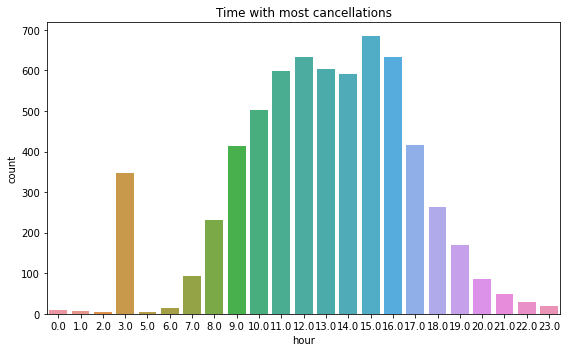

In [14]:
figure,ax=plt.subplots(figsize=(8,5))

sns.countplot(x='hour',data=df,ax=ax)
ax.set_title('Time with most cancellations')

plt.tight_layout()

In [15]:
df["hour"].value_counts()

15.0    684
12.0    633
16.0    632
13.0    603
11.0    598
14.0    591
10.0    502
17.0    416
9.0     413
3.0     348
18.0    262
8.0     232
19.0    170
7.0      94
20.0     85
21.0     48
22.0     29
23.0     18
6.0      15
0.0      10
1.0       6
5.0       5
2.0       4
Name: hour, dtype: int64

<AxesSubplot:xlabel='Cancellation Day', ylabel='hour'>

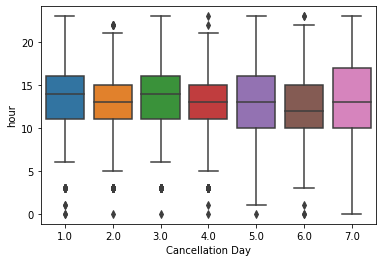

In [16]:
sns.boxplot(x='Cancellation Day',y='hour',data=df)

In [17]:
df_Friday = df["Cancellation Day"]=="5.0"

In [18]:
df_Friday.head()

0    False
1    False
2    False
3    False
4    False
Name: Cancellation Day, dtype: bool

In [19]:
df["Platform"].value_counts()

android     2742
desktop     2387
ios          796
API          472
peer_web       1
Name: Platform, dtype: int64

In [20]:
df1 = df[df["Platform"]=="android"].reset_index(drop=True)
df1.head()

Personal or Business  Business Number Vehicle Type Standard or Express  \
0             Personal              NaN         Bike             Express   
1             Personal              NaN         Bike             Express   
2             Business          20680.0         Bike             Express   
3             Personal              NaN         Bike             Express   
4             Personal              NaN         Bike            Standard   

  Platform                                Cancel Reason Cancelled by  \
0  android  No driver has been allocated to my request.     Customer   
1  android                       My order is not ready.     Customer   
2  android                I placed the wrong locations.     Customer   
3  android                       My order is not ready.     Customer   
4  android  No driver has been allocated to my request.     Customer   

   Placement Day Placement Time  Confirmation Day  ... Distance (KM)  \
0            1.0       17:55:38               NaN  ...           9.0   
1            1.0       12:26:27               1.0  ...          14.0   
2            1.0       13:21:18               1.0  ...          16.0   
3            1.0       10:29:19               NaN  ...          20.0   
4            1.0       10:11:45               NaN  ...          16.0   

   Pickup Lat Pickup Long  scheduled              diff   mask             new  \
0   -1.313053   36.841437   OnDemAND               NaT  False             NaT   
1   -1.318959   36.853394   OnDemAND -1 days +18:32:09  False             NaT   
2   -1.313854   36.706867   OnDemAND   0 days 01:18:45   True 0 days 01:18:45   
3   -1.206197   36.778776   OnDemAND -1 days +20:42:00  False             NaT   
4   -1.212616   36.908138   OnDemAND   0 days 02:11:36   True 0 days 02:11:36   

   hour  minute second  
0  17.0    56.0   35.0  
1  12.0    28.0   44.0  
2  13.0    47.0   29.0  
3  10.0    29.0   29.0  
4  10.0    15.0    4.0  

[5 rows x 23 columns]

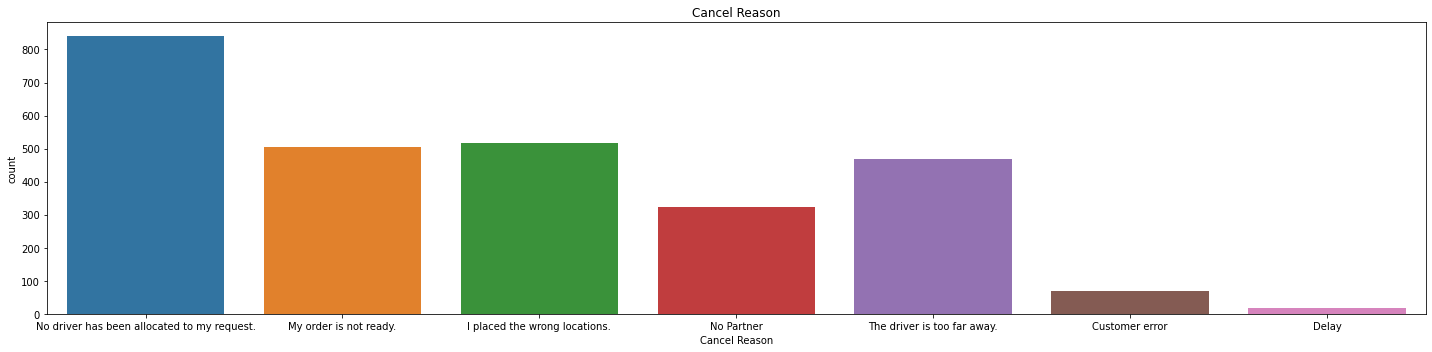

In [21]:
figure,ax=plt.subplots(figsize=(20,5))

sns.countplot(x='Cancel Reason',data=df1,ax=ax)
ax.set_title('Cancel Reason')

plt.tight_layout()

In [22]:
df2 = df[df["Platform"]=="ios"].reset_index(drop=True)
df2.head()

Personal or Business  Business Number Vehicle Type Standard or Express  \
0             Personal              NaN         Bike            Standard   
1             Personal              NaN         Bike             Express   
2             Personal              NaN         Bike            Standard   
3             Personal              NaN         Bike             Express   
4             Personal              NaN         Bike            Standard   

  Platform   Cancel Reason Cancelled by  Placement Day Placement Time  \
0      ios      No Partner        Staff            1.0       14:34:05   
1      ios  Customer error        Staff            1.0       07:37:19   
2      ios      No Partner        Staff            1.0       09:42:43   
3      ios  Customer error        Staff            1.0       07:35:13   
4      ios      No Partner        Staff            1.0       14:21:08   

   Confirmation Day  ... Distance (KM)  Pickup Lat Pickup Long  scheduled  \
0               1.0  ...          11.0   -1.296958   36.808166   OnDemAND   
1               1.0  ...           7.0   -1.291352   36.772931   OnDemAND   
2               1.0  ...           8.0   -1.246445   36.791495   OnDemAND   
3               1.0  ...           7.0   -1.294952   36.766731   OnDemAND   
4               1.0  ...          11.0   -1.294954   36.808914   OnDemAND   

               diff   mask             new  hour  minute second  
0   0 days 05:20:12   True 0 days 05:20:12  15.0    49.0   41.0  
1 -1 days +16:13:47  False             NaT   8.0     3.0   28.0  
2   0 days 08:33:52   True 0 days 08:33:52  11.0    33.0   52.0  
3 -1 days +17:09:50  False             NaT   8.0     4.0    4.0  
4   0 days 06:50:03   True 0 days 06:50:03  15.0    47.0   48.0  

[5 rows x 23 columns]

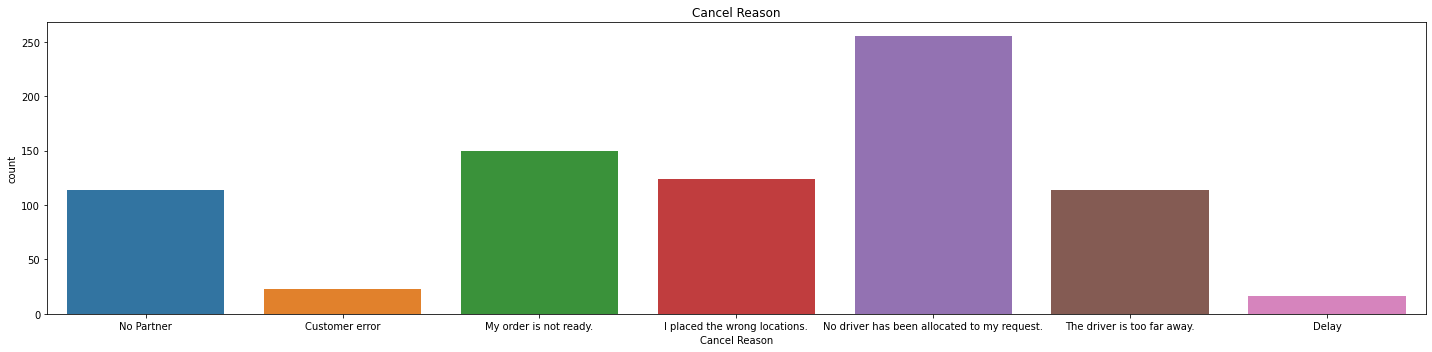

In [23]:
figure,ax=plt.subplots(figsize=(20,5))

sns.countplot(x='Cancel Reason',data=df2,ax=ax)
ax.set_title('Cancel Reason')

plt.tight_layout()

In [24]:
df["Standard or Express"].value_counts()

Express     4013
Standard    2380
Name: Standard or Express, dtype: int64

In [25]:
df3 = df[df["Standard or Express"]=="Express"].reset_index(drop=True)
df3.head()

Personal or Business  Business Number Vehicle Type Standard or Express  \
0             Personal              NaN         Bike             Express   
1             Personal              NaN         Bike             Express   
2             Business          20680.0         Bike             Express   
3             Personal              NaN         Bike             Express   
4             Personal              NaN         Bike             Express   

  Platform                                Cancel Reason Cancelled by  \
0  android  No driver has been allocated to my request.     Customer   
1  android                       My order is not ready.     Customer   
2  android                I placed the wrong locations.     Customer   
3  android                       My order is not ready.     Customer   
4      ios                               Customer error        Staff   

   Placement Day Placement Time  Confirmation Day  ... Distance (KM)  \
0            1.0       17:55:38               NaN  ...           9.0   
1            1.0       12:26:27               1.0  ...          14.0   
2            1.0       13:21:18               1.0  ...          16.0   
3            1.0       10:29:19               NaN  ...          20.0   
4            1.0       07:37:19               1.0  ...           7.0   

   Pickup Lat Pickup Long  scheduled              diff   mask             new  \
0   -1.313053   36.841437   OnDemAND               NaT  False             NaT   
1   -1.318959   36.853394   OnDemAND -1 days +18:32:09  False             NaT   
2   -1.313854   36.706867   OnDemAND   0 days 01:18:45   True 0 days 01:18:45   
3   -1.206197   36.778776   OnDemAND -1 days +20:42:00  False             NaT   
4   -1.291352   36.772931   OnDemAND -1 days +16:13:47  False             NaT   

   hour  minute second  
0  17.0    56.0   35.0  
1  12.0    28.0   44.0  
2  13.0    47.0   29.0  
3  10.0    29.0   29.0  
4   8.0     3.0   28.0  

[5 rows x 23 columns]

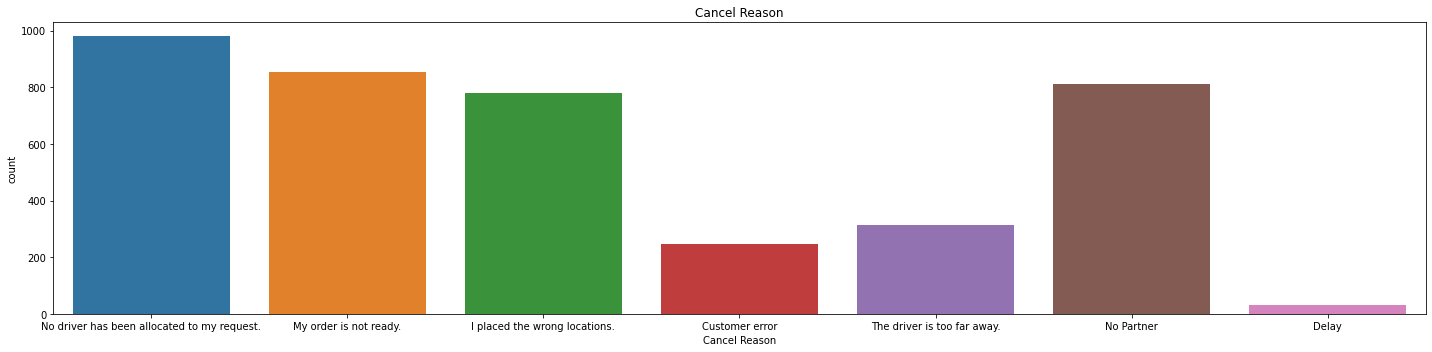

In [26]:
figure,ax=plt.subplots(figsize=(20,5))

sns.countplot(x='Cancel Reason',data=df3,ax=ax)
ax.set_title('Cancel Reason')

plt.tight_layout()

In [27]:
df4 = df[df["Standard or Express"]=="Standard"].reset_index(drop=True)
df4.head()

Personal or Business  Business Number Vehicle Type Standard or Express  \
0             Personal              NaN         Bike            Standard   
1             Personal              NaN         Bike            Standard   
2             Personal              NaN         Bike            Standard   
3             Business          57544.0         Bike            Standard   
4             Business          20680.0         Bike            Standard   

  Platform                                Cancel Reason Cancelled by  \
0      ios                                   No Partner        Staff   
1  android  No driver has been allocated to my request.     Customer   
2  desktop  No driver has been allocated to my request.     Customer   
3      API                                   No Partner        Staff   
4  desktop                                   No Partner        Staff   

   Placement Day Placement Time  Confirmation Day  ... Distance (KM)  \
0            1.0       14:34:05               1.0  ...          11.0   
1            1.0       10:11:45               NaN  ...          16.0   
2            1.0       16:10:52               NaN  ...          21.0   
3            1.0       17:19:39               1.0  ...           6.0   
4            1.0       15:09:54               1.0  ...          20.0   

   Pickup Lat Pickup Long  scheduled              diff   mask             new  \
0   -1.296958   36.808166   OnDemAND   0 days 05:20:12   True 0 days 05:20:12   
1   -1.212616   36.908138   OnDemAND   0 days 02:11:36   True 0 days 02:11:36   
2   -1.257130   36.699467  Scheduled -1 days +21:29:38  False             NaT   
3   -1.304977   36.783630   OnDemAND   0 days 10:06:43   True 0 days 10:06:43   
4   -1.256347   36.800263   OnDemAND -1 days +16:23:42  False             NaT   

   hour  minute second  
0  15.0    49.0   41.0  
1  10.0    15.0    4.0  
2   7.0    44.0   42.0  
3  19.0     1.0   43.0  
4   3.0     0.0    0.0  

[5 rows x 23 columns]

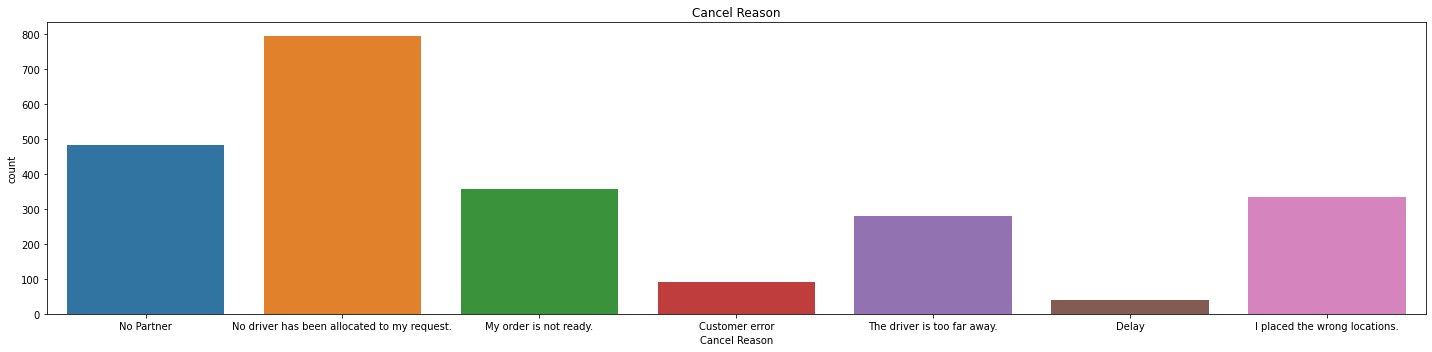

In [28]:
figure,ax=plt.subplots(figsize=(20,5))

sns.countplot(x='Cancel Reason',data=df4,ax=ax)
ax.set_title('Cancel Reason')

plt.tight_layout()